In [1]:
import sys
import os
sys.path.append('/home/ppxjd3/Code')

import matplotlib.pyplot as plt
import numpy as np

from Generic import filedialogs
from ParticleTracking import dataframes

%matplotlib qt


In [2]:
file = filedialogs.load_filename('Load a dataframe',
                                 '/media/Data/data',
                                 '*.hdf5')
data = dataframes.DataStore(file)


Get mean order for each duty cycle

In [3]:
mean_duty = data.df.groupby('Duty').mean()


In [24]:
mean_duty = mean_duty.drop(0)
mean_duty.index


UInt64Index([400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
             ...
             974, 975, 976, 977, 978, 979, 980, 981, 983, 985],
            dtype='uint64', name='Duty', length=553)

Text(0.5, 1.0, '15600001.hdf5')

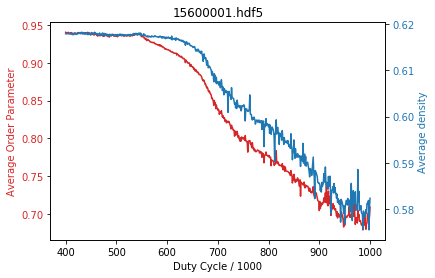

In [4]:
order = mean_duty.order_r
density = mean_duty.density
duties = mean_duty.index
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

color1 = 'tab:red'

ax1.plot(duties, order, color=color1)
ax1.set_xlabel('Duty Cycle / 1000')
ax1.set_ylabel('Average Order Parameter', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'tab:blue'
ax2.plot(duties, density, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel('Average density', color=color2)
ax1.set_title(os.path.split(file)[1])


In [33]:
data.df = data.df.reset_index().set_index('Duty')
data.df.head()


,frame,x,y,r,particle,order_r,order_i,order_mag,neighbors,order_mean,order_sus,density,shape_factor,on_edge
Duty,,,,,,,,,,,,,,
985,0,993,727,13,0,0.877166,-0.388554,0.959372,3,0.731348,0.05058,1687.766724,1.332709,False
985,0,1231,1463,13,1,0.183332,0.161232,0.244144,5,0.731348,0.05058,2466.686523,1.211645,False
985,0,1232,1239,13,2,0.858125,0.430400,0.960012,5,0.731348,0.05058,2367.313477,1.327300,False
985,0,1240,134,13,3,0.803376,0.128297,0.813556,5,0.731348,0.05058,2221.979980,1.229863,False
985,0,1244,266,13,4,-0.579496,0.379691,0.692806,4,0.731348,0.05058,1298.586182,1.251564,False


In [40]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [42]:
fig, ax = plt.subplots()
for di in [400, 500, 600, 700, 800, 900]:
    d = find_nearest(data.df.index, di)
    print(d)
    order = data.df.loc[d, 'order_mag'].values
    freq, bins = np.histogram(order, bins=np.linspace(0, 1, 100))
    bins += (bins[1]-bins[0])/2
    ax.plot(bins[:-1], freq, label=d)
ax.legend()
ax.set_xlabel('Order parameter')
ax.set_ylabel('Frequency')
plt.show()

400
500
600
700
800
901
